In [1]:
import numpy as np
import sklearn as sk
import pylab as plt
import pandas as pd
import os
import torch
from tqdm.auto import tqdm, trange

from sklearn.ensemble import RandomForestClassifier
from common import gsave, gload
from nde.uci import get_uci_info, load_uci

In [48]:
def plot_confusion(cm, display_labels=None, include_values=True, cmap='viridis',
         xticks_rotation='horizontal', values_format=None, ax=None,
         ylabel="True label",
        xlabel="Predicted label",
                vmin=None, vmax=None):
    """Plot visualization. 
    https://github.com/scikit-learn/scikit-learn/blob/483cd3eaa/sklearn/metrics/_plot/confusion_matrix.py#L11
    """
    
#     cm = cm.T # TRANSPOSE
    n_classes = cm.shape[0]
    
    import matplotlib.pyplot as plt
    from itertools import product

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure

    im_ = ax.imshow(cm, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    text_ = None
    cmap_min, cmap_max = im_.cmap(0), im_.cmap(256)

    if include_values:
        text_ = np.empty_like(cm, dtype=object)

        # print text with appropriate color depending on background
        thresh = (vmax + vmin)/2.0 #(cm.max() + cm.min()) / 2.0

        for i, j in product(range(n_classes), range(n_classes)):
            color = cmap_max if cm[i, j] < thresh else cmap_min

            if values_format is None:
                text_cm = format(cm[i, j], '.2f')
                if cm.dtype.kind != 'f':
                    text_d = format(cm[i, j], 'd')
                    if len(text_d) < len(text_cm):
                        text_cm = text_d
            else:
                text_cm = format(cm[i, j], values_format)

            text_[i, j] = ax.text(
                j, i, text_cm,
                ha="center", va="center",
                color=color)

    if display_labels is None:
        display_labels = np.arange(n_classes)

    #fig.colorbar(self.im_, ax=ax)
    ax.set(xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=display_labels,
           yticklabels=display_labels,
           ylabel=ylabel,
           xlabel=xlabel)
#     ax.set_axis_off()
    ax.set_ylim((n_classes - 0.5, -0.5))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)

    return (fig, ax)

In [38]:
uname = 'molec-biol-splice'
allres = gload(f'gs://ANONYMOUS/results/nde/uci/conf/{uname}_many')

In [66]:
def do_plot(allres):
    import seaborn as sns
    sns.set()
    sns.set_style("white", {'axes.grid' : False})

    import matplotlib as mpl
    mpl.rcParams.update({'axes.labelsize': 18,
                         'axes.titlesize': 18,
                         })


    res = allres[:6] # first 5 only
    # res = [allres[i] for i in [0, 2, 5]]
    fig, axs = plt.subplots(2, len(res), figsize=(14, 5), dpi=150)

    vmax = max([np.max(r['cm_tr_ideal']) for r in res])

    for i, r in enumerate(res):
        cm_tr = r['cm_tr_ideal']
        cm_te = r['cm_te']
        p = r['p']

        ylabel = 'y'
        if i == 0:
            ylabel = 'Train Set\n\n' + ylabel

        plot_confusion(cm_tr, ax=axs[0, i], display_labels=None, xlabel='L', ylabel=ylabel, vmin=0, vmax=vmax)
        axs[0, i].set_title(f'p = {p:.1f}')

        ylabel = 'f(x)'
        if i == 0:
            ylabel = 'Test Set\n\n' + ylabel
        plot_confusion(cm_te, ax=axs[1, i], display_labels=None, xlabel='L', ylabel=ylabel, vmin=0, vmax=vmax)
        axs[1, i].set_title(f'p = {p:.1f}')

        if i > 0:
            for j in range(2):
    #             axs[j, i].set_axis_off()
                axs[j, i].set(xticklabels=[],yticklabels=[])

    plt.tight_layout(h_pad=2.5)   

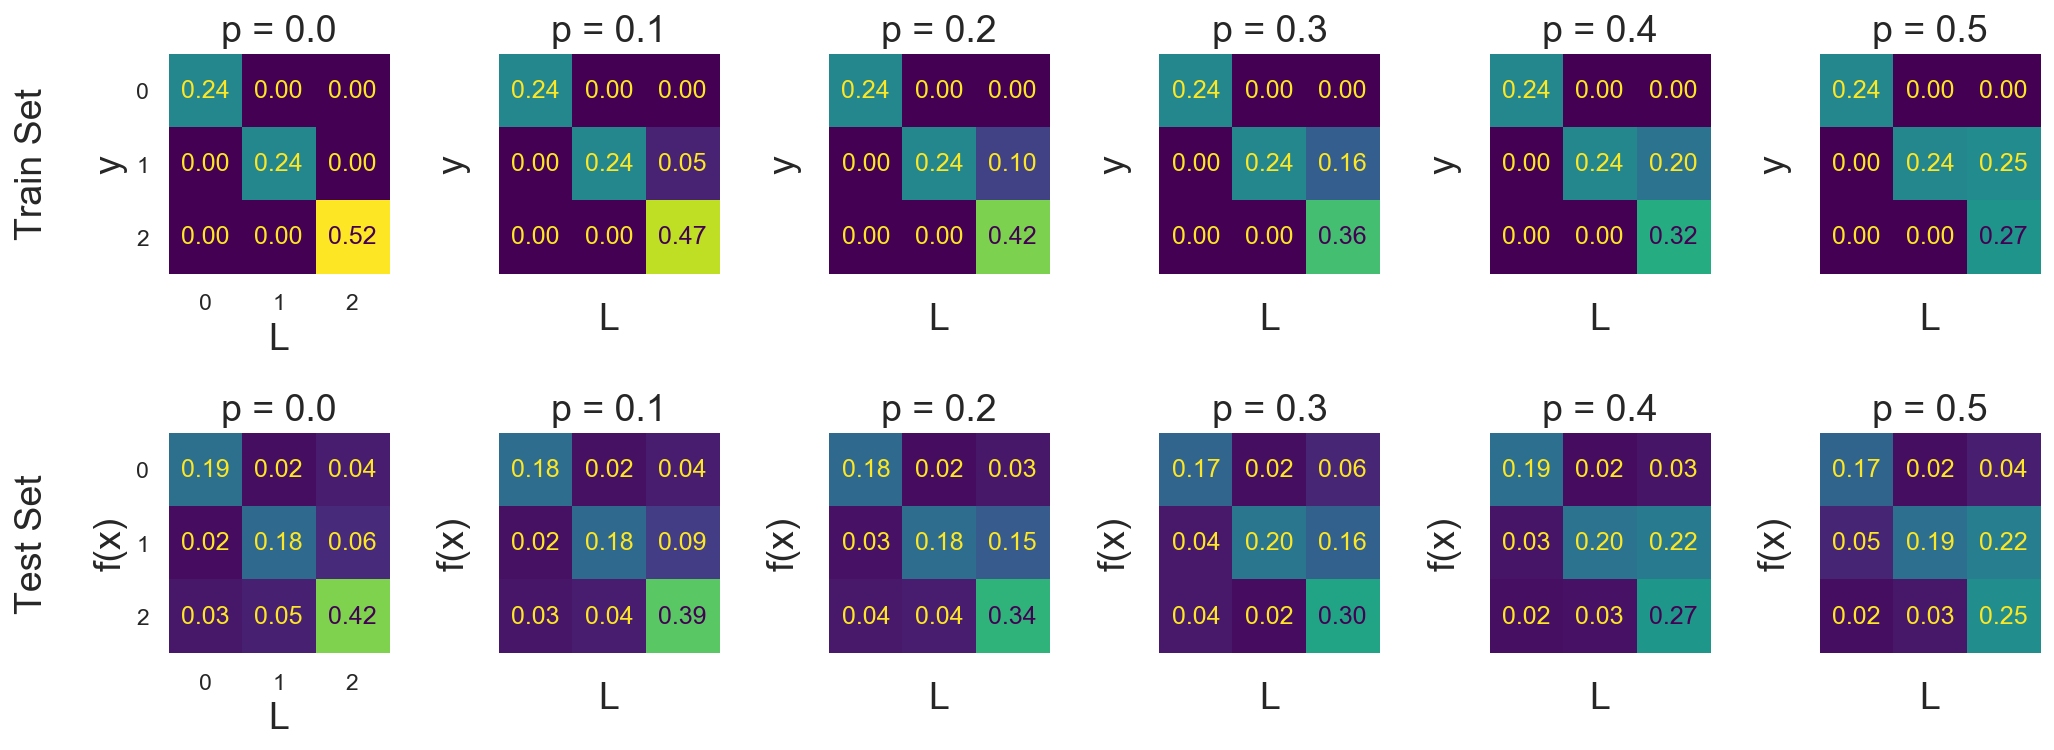

In [65]:
uname = 'molec-biol-splice'
allres = gload(f'gs://ANONYMOUS/results/nde/uci/conf/{uname}_many')

import seaborn as sns
sns.set()
# plt.style.use('default')
sns.set_style("white", {'axes.grid' : False})

import matplotlib as mpl
mpl.rcParams.update({'axes.labelsize': 18,
                     'axes.titlesize': 18,
                     })


res = allres[:6] # first 5 only
# res = [allres[i] for i in [0, 2, 5]]
fig, axs = plt.subplots(2, len(res), figsize=(14, 5), dpi=150)
    
vmax = max([np.max(r['cm_tr_ideal']) for r in res])
    
for i, r in enumerate(res):
    cm_tr = r['cm_tr_ideal']
    cm_te = r['cm_te']
    p = r['p']

    ylabel = 'y'
    if i == 0:
        ylabel = 'Train Set\n\n' + ylabel
    
    plot_confusion(cm_tr, ax=axs[0, i], display_labels=None, xlabel='L', ylabel=ylabel, vmin=0, vmax=vmax)
    axs[0, i].set_title(f'p = {p:.1f}')
    
    ylabel = 'f(x)'
    if i == 0:
        ylabel = 'Test Set\n\n' + ylabel
    plot_confusion(cm_te, ax=axs[1, i], display_labels=None, xlabel='L', ylabel=ylabel, vmin=0, vmax=vmax)
    axs[1, i].set_title(f'p = {p:.1f}')
    
    if i > 0:
        for j in range(2):
#             axs[j, i].set_axis_off()
            axs[j, i].set(xticklabels=[],yticklabels=[])
    
plt.tight_layout(h_pad=2.5)
plt.savefig('./figs/molbio.png', bbox_inches=0)

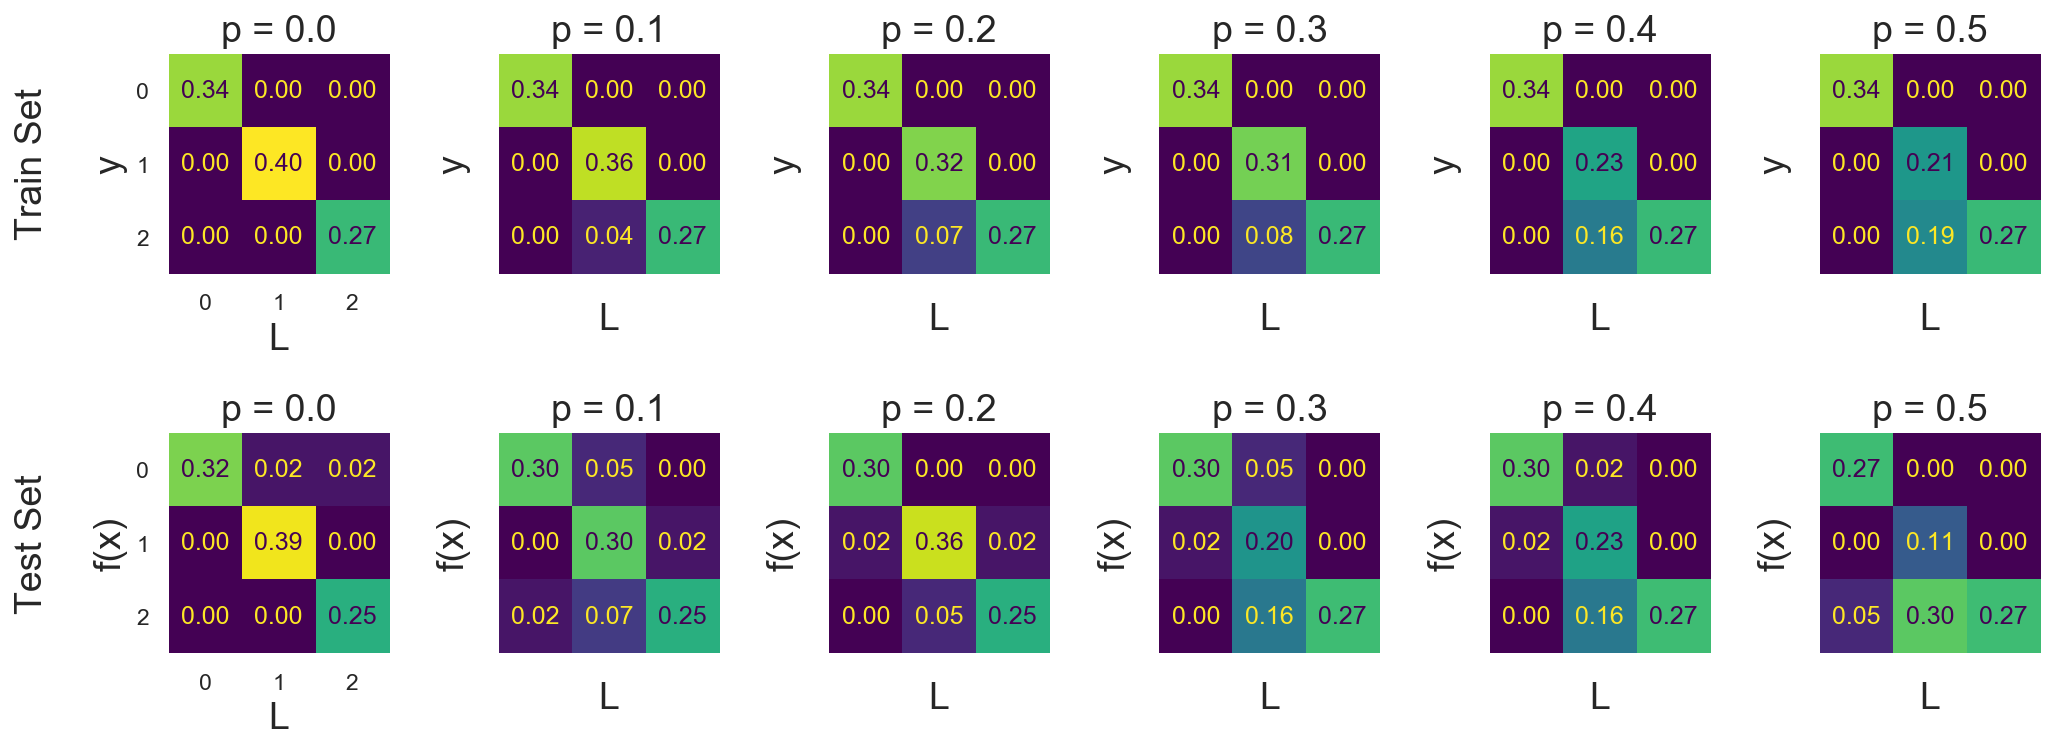

In [67]:
uname = 'wine'
allres = gload(f'gs://ANONYMOUS/results/nde/uci/conf/{uname}_many2')
do_plot(allres)
plt.savefig(f'./figs/{uname}.png', bbox_inches=0)

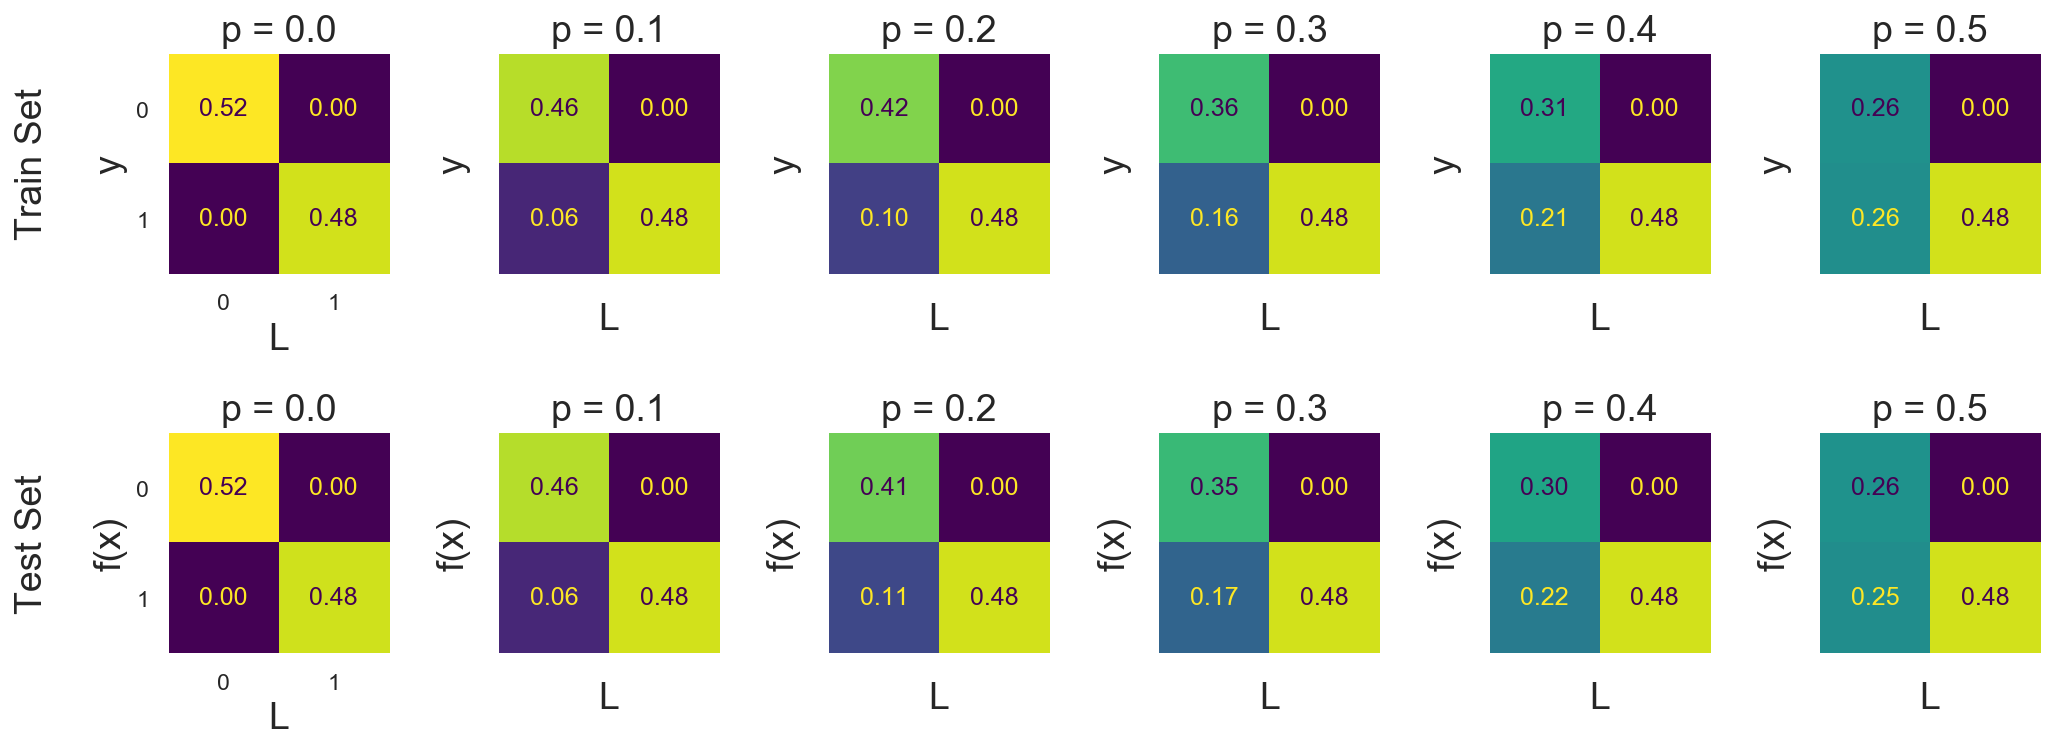

In [68]:
uname = 'mushroom'
allres = gload(f'gs://ANONYMOUS/results/nde/uci/conf/{uname}_many')
do_plot(allres)
plt.savefig(f'./figs/{uname}.png', bbox_inches=0)